Enter the number of nodes:  6
Enter the number of edges:  6


Enter 6 edges for the graph (in the form of 'node1 node2').


Enter edge:  0 1
Enter edge:  0 2
Enter edge:  1 3
Enter edge:  1 4
Enter edge:  2 5
Enter edge:  4 5


Input Graph:


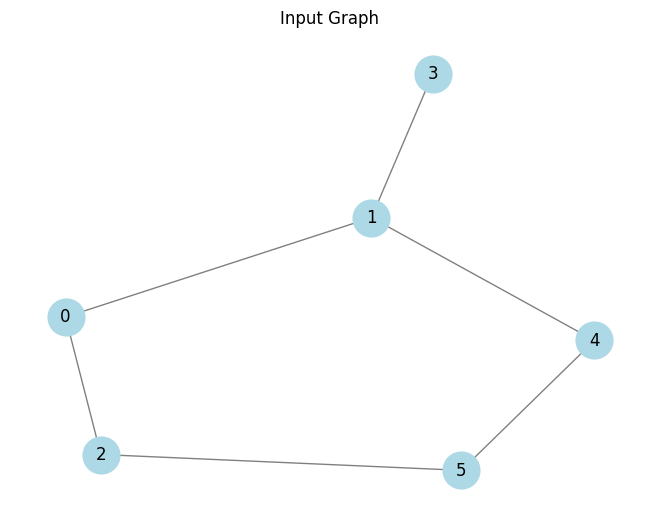


Non-Recursive DFS Traversal Order:
[0, 2, 5, 4, 1, 3]


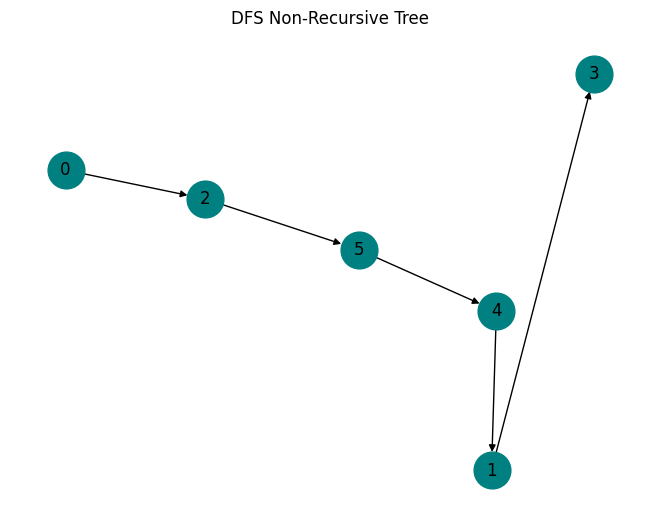

In [1]:
# 2. Implement Non-Recursive Depth First Search Algorithm. Read the
# undirected unweighted graph from user. 
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualization:
    def __init__(self):
        self.visual = []
        self.graph = {}

    def addEdge(self, a, b):
        a, b = int(a), int(b)  # Cast to plain int
        self.visual.append([a, b])
        if a not in self.graph:
            self.graph[a] = []
        if b not in self.graph:
            self.graph[b] = []
        self.graph[a].append(b)
        self.graph[b].append(a)

    def visualize(self, title):
        grp = nx.Graph()
        grp.add_edges_from(self.visual)
        pos = nx.spring_layout(grp)
        plt.figure()
        nx.draw(grp, pos, with_labels=True, node_color="lightblue", node_size=700, edge_color="gray")
        plt.title(title)
        plt.show()

    def dfs_non_recursive(self, start_node):
        visited = set()
        stack = [(start_node, None)]
        tree_edges = []
        order = []

        while stack:
            node, parent = stack.pop()
            if node not in visited:
                visited.add(node)
                order.append(node)
                if parent is not None:
                    tree_edges.append((parent, node))
                for neighbor in self.graph.get(node, []):
                    if neighbor not in visited:
                        stack.append((neighbor, node))

        tree = nx.DiGraph()
        tree.add_edges_from(tree_edges)
        return tree, order

    def visualize_tree(self, tree, title):
        pos = nx.spring_layout(tree)
        plt.figure()
        nx.draw(tree, pos, with_labels=True, node_color="teal", node_size=700, edge_color="black", arrows=True)
        plt.title(title)
        plt.show()


# Create graph instance
G = GraphVisualization()

# Get number of nodes and edges from the user
num_nodes = int(input("Enter the number of nodes: "))  # User input for number of nodes
num_edges = int(input("Enter the number of edges: "))  # User input for number of edges

# Read edges from user input
print(f"Enter {num_edges} edges for the graph (in the form of 'node1 node2').")
for _ in range(num_edges):
    while True:
        edge_input = input("Enter edge: ")
        try:
            node1, node2 = map(int, edge_input.split())
            if node1 < num_nodes and node2 < num_nodes:
                G.addEdge(node1, node2)
                break
            else:
                print(f"Nodes must be between 0 and {num_nodes-1}. Please try again.")
        except ValueError:
            print("Invalid input. Please enter two integers separated by space.")

# Visualize the input graph
print("Input Graph:")
G.visualize("Input Graph")

# Perform Non-Recursive DFS
print("\nNon-Recursive DFS Traversal Order:")
tree_non_recursive, order_non_recursive = G.dfs_non_recursive(0)
print([int(x) for x in order_non_recursive])  # Ensures clean output
G.visualize_tree(tree_non_recursive, "DFS Non-Recursive Tree")
# edges.csv 0,1 | 0,2 | 1,3 | 1,4 | 2,5 | 2,6 | 3,7 | 3,8 | 4,9 | 5,6 | 6,7 | 7,8 | 8,9 | 0,5 | 1,6 | 2,9 | 3,5 | 4,8 | 0,7 | 1,8 | 6,9 | 5,9 | 0,6 | 3,9 | 2,4
# edges_small.csv 6,6 0,1 | 0,2 | 1,3 | 1,4 | 2,5 | 4,5 